# Big Mart Sales Data Analysis using python

The data scientists at BigMart have collected 2013 sales data for some products across few stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to analyse this data set to find out some important already hidden insights of the data set.

This analysis work is used to understand the properties of products and stores which play a key role in increasing sales.

In [ ]:
project_name = "Project-Work-Zero-to-Pandas" 

In [ ]:
!pip install jovian --upgrade -q

## Data Preparation and Cleaning

In this section, we are going to prepare and clean the data set for further analysis work. For this purpose we use two libraries ,i.e., pandas and numpy


In [ ]:
# Loading required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**1.** Loading the dataset into a data frame named **data** using pandas

In [ ]:
data = pd.read_csv("../input/big-mart-sales-prediction/Train.csv")

**2.** Viewing first five rows of **data**

In [ ]:
data.head(5)

**3.** Determining number of rows and columns of **data**

In [ ]:
data.shape


There are **8523 rows** and **12 columns**.

**4.** Available Variables/features in **data**

In [ ]:
data.columns

**5.** Determining the presence of missing values in **data**

In [ ]:
data.isnull().sum()

From the above output, we see that two variables contains missing values.

**6.** Missing Value Imputation in **data**

In [ ]:
# Filling missing values in Item_Weight by mean 
data["Item_Weight"].fillna(np.nanmean(data["Item_Weight"]) , inplace = True)

In [ ]:
# Frequency table for Outlet_Size
data["Outlet_Size"].value_counts()

In [ ]:
# Filling missing values in Outlet_Size by most frequent value
data["Outlet_Size"].fillna("Medium" , inplace = True)

In [ ]:
# Again checking the presence of missing values
data.isnull().sum()

Now, there are no missing values in the given data set.

**7.** Creating additional columns in **data**

In [ ]:
# Creating a column named "MRP per weight"
data["MRP per weight"] = data["Item_MRP"]/data["Item_Weight"]

In [ ]:
# Displaying first five rows and all columns
data.head(5)

**8.** Correcting data values in Categorical Variables 

In [ ]:
# Frequency table for Item_Type
data["Item_Type"].value_counts()

In [ ]:
# Frequency table for Outlet_Location_Type
data["Outlet_Location_Type"].value_counts()

In [ ]:
# Frequency table for Outlet_Type
data["Outlet_Type"].value_counts()

In [ ]:
# Frequency table for Item_Fat_Content
data["Item_Fat_Content"].value_counts()

In Item_Fat_Content, We have to replace LF by Low Fat, reg by Regular Fat, Regular by Regular Fat and low fat by Low Fat.

In [ ]:
data['Item_Fat_Content'] = np.where((data.Item_Fat_Content == 'LF'),'Low Fat',data.Item_Fat_Content)

In [ ]:
data['Item_Fat_Content'] = np.where((data.Item_Fat_Content == 'low fat'),'Low Fat',data.Item_Fat_Content)

In [ ]:
data['Item_Fat_Content'] = np.where((data.Item_Fat_Content == 'reg'),'Regular Fat',data.Item_Fat_Content)

In [ ]:
data['Item_Fat_Content'] = np.where((data.Item_Fat_Content == 'Regular'),'Regular Fat',data.Item_Fat_Content)

In [ ]:
# Again displaying frequency table for Item_Fat_Content
data["Item_Fat_Content"].value_counts()

## Exploratory Analysis and Visualization

In this section, Our main aim is to visualize the given data set with the help of different statistical plots and measures. Statistical plots are prepared with the help of **matplotlib** and **seaborn** library.

**9.** Statistical Summary of **data**

In [ ]:
# Determinig five point summary measures for all numeric varibles
data.describe(include = ['float'] , exclude = ['int'])

[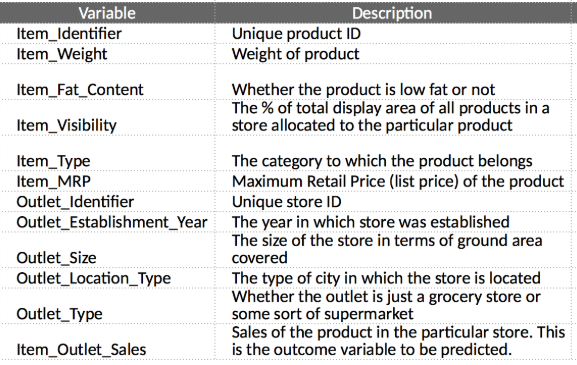](http://)

**10.** Exploring distributions of numeric variables

**distplot** function of **seaborn** library is used to plot histogram / distribution of a numeric variable.

In [ ]:
# Distribution of Item_MRP
sns.distplot(data['Item_MRP'], hist=True, kde=True, 
             bins=int(180/2), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

From the above output, we see that there are four different groups of prices.

In [ ]:
# Distribution of MRP per weight
sns.distplot(data['MRP per weight'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

MRP per weight has **Right skewed distribution**.

In [ ]:
# Distribution of Item_Outlet_Sales
sns.distplot(data['Item_Outlet_Sales'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

Item_Outlet_Sales has **Right skewed distribution**.

**11.** Exploring relationships between different numeric variables

**scatter** function of **seaborn** library is used to draw scatter plot / to explore relationships between different numeric variables.

In [ ]:
# Scatter plot between Item_Weight and Item_MRP
plt.scatter(data['Item_Weight'] , data['Item_MRP'])

In [ ]:
# Scatter plot between Item_Weight and Item_Outlet_Sales
plt.scatter(data['Item_Weight'] , data['Item_Outlet_Sales'])

In [ ]:
# Scatter plot between Item_MRP and Item_Outlet_Sales
plt.scatter(data['Item_MRP'] , data['Item_Outlet_Sales'])

In [ ]:
# Scatter plot between MRP per weight and Item_Outlet_Sales
plt.scatter(data['MRP per weight'] , data['Item_Outlet_Sales'])

**12.** Interesting Insights

1. There is no linear relationship between **Item_Weight** and **Item_MRP**
2. There is no linear relationship between **Item_Weight** and **Item_Outlet_Sales**
3. There is positive correlation between **Item_MRP** and **Item_Outlet_Sales** with presence of heteroscedasticity.
4. There is a little linear relationship between **MRP per weight** and **Item_Outlet_Sales**

## Asking and Answering Question

In this section, Some interesting questions are first asked and then provided their answers with the help of statistical plots or measures.

**13.** Is there any relationship between **weight** and price(**MRP**) of an item ?

In [ ]:
plt.scatter(data['Item_Weight'] , data['Item_MRP'])

There is no linear relationship (correlation = 0 ) between **Item_Weight** and **Item_MRP**

**14.** Is there any relationship between **Item_MRP** and **Item_Fat_Content** variables?

In [ ]:
sns.boxplot(data['Item_Fat_Content'], data['Item_MRP'])

There is no relationship between **Item_Fat_Content** and **Item_MRP**. Since the average value of price for Low and Regular Fat are approximately equal.

**15.** Is there any relationship between **Item_Type** and **Item_MRP** variables ?

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(data['Item_Type'], data['Item_MRP'])

From the above output, It is clear that there is some minor relationship between **Item_Type** and **Item_MRP**. But it requires some more quantitaive analysis.

**16.** Which type of outlet has maximum sales ?

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data['Outlet_Type'],data['Item_Outlet_Sales'])

**Supermarket Type 3 has maximum sales.**

**17.** Which size of outlet has maximum sales ?

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data['Outlet_Size'],data['Item_Outlet_Sales'])

**High Outlet_Size has maximum sales.**

**18.** In an outlet type, which **Outlet_Size** ocuurs most frequently ?

In [ ]:
data.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].count()

Medium Outlet_Size occurs most frequently in all Outlet_Type. 

**19.** Is there any effect of **Outlet_Size** on **Item_Outlet_Sales** ?

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data['Outlet_Size'], data['Item_Outlet_Sales'])

There is not the effect of Outlet_Size on Item_Outlet_Sales. Also, as we see that there are more outliers in the data set , hence it may be possible that there is effect of outlet_size on Item_Outlet_Sales. It requires some more analysis work.

**20.** Is there any effect of **Outlet_Type** on **Item_Outlet_Sales** ?

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data['Outlet_Type'], data['Item_Outlet_Sales'])

There is effect of Outlet_Type on Item_Outlet_Sales as average value of Item_Outlet_Sales differ significantly.

**21.** In which type of outlet, there is maximum chance of getting low fat item ?

In [ ]:
data.groupby(['Item_Fat_Content','Outlet_Type'])['Item_Outlet_Sales'].count()

The order (highest to lowest) of probabilty of getting low fat item in an Outlet_Type is :

**Supermarket Type1 > Grocery Store > Supermarket Type3 > Supermarket Type2**


**22.** In which type of outlet, there is maximum chance of getting regular fat item ?

In [ ]:
data.groupby(['Item_Fat_Content','Outlet_Type'])['Item_Outlet_Sales'].count()

The order (highest to lowest) of probabilty of getting regular fat item in an Outlet_Type is :

**Supermarket Type1 > Grocery Store > Supermarket Type3 = Supermarket Type2**

## Inferences and Conclusion

Following are the important inferences drawn by the above analysis work - 

1. Variables **Item_Outlet_Sales** and **MRP per weight** have **Right skewed distribution**.
2. There are four different groups of price of items in the data set.
3. There is no linear relationship between **Item_Weight** and **Item_MRP**.
4. There is no linear relationship between **Item_Weight** and **Item_Outlet_Sales**.
5. There is positive correlation between **Item_MRP** and **Item_Outlet_Sales** with presence of heteroscedasticity.
6. There is very low linear relationship between **MRP per weight** and **Item_Outlet_Sales**.
7. There is no relationship between **Item_Fat_Content** and **Item_MRP**. Since the average value of price for Low and Regular Fat are approximately equal.
8. There is some minor relationship between **Item_Type** and **Item_MRP**. But it requires some more quantitaive analysis.
9. Supermarket Type 3 has maximum sales.
10. High Outlet_Size has maximum sales.
11. Medium Outlet_Size occurs most frequently in all Outlet_Type. 
12. There is effect of Outlet_Type on Item_Outlet_Sales.
13. The order (highest to lowest) of probabilty of getting low fat item in an Outlet_Type is :

    **Supermarket Type1 > Grocery Store > Supermarket Type3 > Supermarket Type2**
    

14. The order (highest to lowest) of probabilty of getting regular fat item in an Outlet_Type is :

    **Supermarket Type1 > Grocery Store > Supermarket Type3 = Supermarket Type2**


## References and Future Work

1. [Kaggle](https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data)

2. [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/#:~:text=The%20data%20scientists%20at%20BigMart,10%20stores%20in%20different%20cities.&text=So%20the%20idea%20is%20to,come%20up%20with%20certain%20hypothesis.)

3. [Jovian.ml](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-6-exploratory-data-analysis-a-case-study)

Further data analysis work can be done on this data set to obtain some more interesting insights from it and after it we may go for Inferential, Predictive and Prescriptive Analysis work.

In [ ]:
import jovian

In [ ]:
jovian.commit(project = project_name , environment=None)